<a href="https://colab.research.google.com/github/widyadaridhyp/EDA/blob/main/Tugas_1_EDA_Kelompok_O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas 1 EDA Kelompok O
Anggota Kelompok:
1. Evan Haryowidyatna (2006485011)
2. Jasmine Husna Sanditya (2006571034)
3. Kamilia Firzanah (2006526144)
4. Nicholas Sky Salvatio (2006532701)
5. Widyadari Dhiya Parahita (2006572913)

In [ ]:
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
 
plt.style.use('bmh'); sns.set()

In [ ]:
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
    price = pd.read_csv('data/price.csv')

mkdir: cannot create directory ‘data’: File exists
--2021-04-13 14:23:21--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53592 (52K) [text/plain]
Saving to: ‘data/price.csv.6’

price.csv.6         100%[===================>]  52.34K  --.-KB/s    in 0.001s  

2021-04-13 14:23:21 (53.0 MB/s) - ‘data/price.csv.6’ saved [53592/53592]



In [ ]:
print(type(price))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
N, P = price.shape
print(price.shape)

(936, 10)


In [ ]:
price.head()

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


In [ ]:
price.drop("Observation", axis=1, inplace=True) 

In [ ]:
price.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


In [ ]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Dist_Taxi      923 non-null    float64
 1   Dist_Market    923 non-null    float64
 2   Dist_Hospital  935 non-null    float64
 3   Carpet         928 non-null    float64
 4   Builtup        921 non-null    float64
 5   Parking        936 non-null    object 
 6   City_Category  936 non-null    object 
 7   Rainfall       936 non-null    int64  
 8   House_Price    936 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 65.9+ KB


In [ ]:
price['Parking'] = price['Parking'].astype('category')
price['City_Category'] = price['City_Category'].astype('category')
price.dtypes

Dist_Taxi         float64
Dist_Market       float64
Dist_Hospital     float64
Carpet            float64
Builtup           float64
Parking          category
City_Category    category
Rainfall            int64
House_Price         int64
dtype: object

In [ ]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Dist_Taxi      923 non-null    float64 
 1   Dist_Market    923 non-null    float64 
 2   Dist_Hospital  935 non-null    float64 
 3   Carpet         928 non-null    float64 
 4   Builtup        921 non-null    float64 
 5   Parking        936 non-null    category
 6   City_Category  936 non-null    category
 7   Rainfall       936 non-null    int64   
 8   House_Price    936 non-null    int64   
dtypes: category(2), float64(5), int64(2)
memory usage: 53.4 KB


In [ ]:
print(price.shape)
price.duplicated().sum()

(936, 9)


4

In [ ]:
price.drop_duplicates(inplace=True) #menghapus duplikat
print(price.duplicated().sum()) 
print(price.shape) # cek hasil

0
(932, 9)


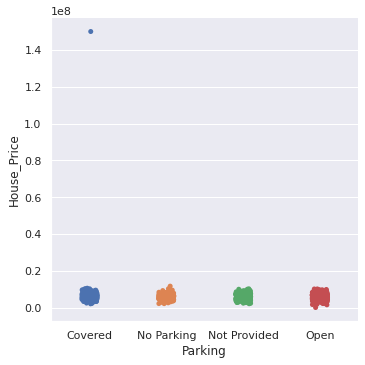

In [ ]:
p= sns.catplot(x="Parking", y="House_Price", data=price)

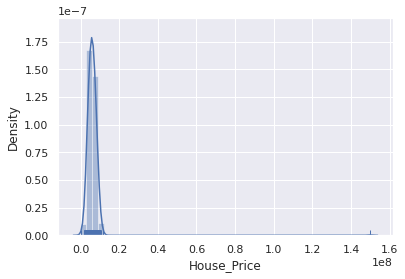

In [ ]:
p = sns.distplot(price['House_Price'], kde=True, rug=True)

In [ ]:
# Misal dengan asumsi data berdistribusi normal
# dan menggunakan 95% confidence interval di sekitar variabel "harga"

df = np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())
# mu-2s<x<mu+2s
print(df.shape)
df.head()

(932,)


0    True
1    True
2    True
3    True
4    True
Name: House_Price, dtype: bool

In [ ]:
price2 = price[df] # data tanpa outliers
print(price2.shape, price.shape)

(931, 9) (932, 9)


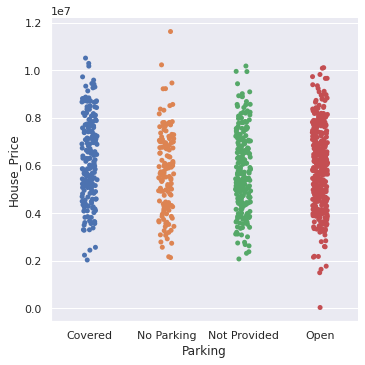

In [ ]:
p= sns.catplot(x="Parking", y="House_Price", data=price2)

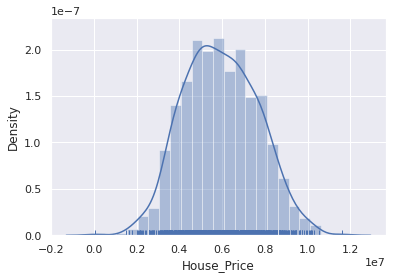

In [ ]:
# Distributions
p = sns.distplot(price2['House_Price'], kde=True, rug=True)

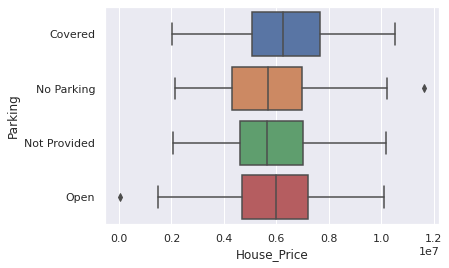

In [ ]:
p = sns.boxplot(x="House_Price", y="Parking", data=price2)

## TUGAS NOMOR 1 
- Keluarkan outlier atas dari grafik diatas

In [ ]:
Q1 = price2['House_Price'].quantile(0.25)
Q3 = price2['House_Price'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

outliers = (price2["House_Price"] > (Q3 + 1.5*IQR))
rumah_kemahalan = price2.loc[outliers]

4658000.0 7180500.0 2522500.0


In [ ]:
rumah_kemahalan

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
678,7288.0,9560.0,12531.0,1989.0,2414.0,No Parking,CAT A,860,11632000


## TUGAS NOMOR 2

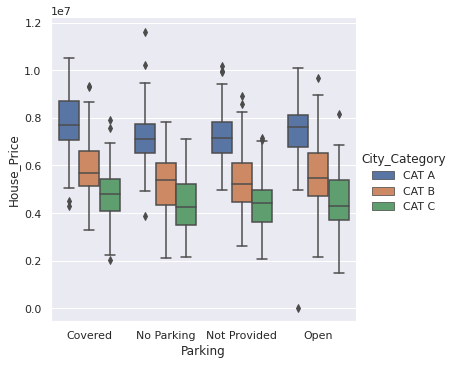

In [ ]:
p = sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="box", data=price2)

In [ ]:
price2.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


In [ ]:
price2.dtypes

Dist_Taxi         float64
Dist_Market       float64
Dist_Hospital     float64
Carpet            float64
Builtup           float64
Parking          category
City_Category    category
Rainfall            int64
House_Price         int64
dtype: object

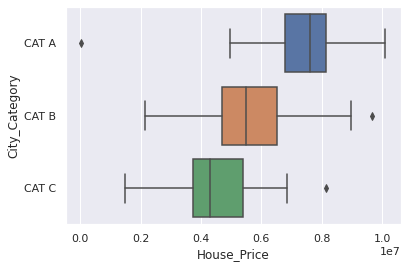

In [ ]:
open = price2[price2.Parking == "Open"]
sns.boxplot(x="House_Price", y="City_Category", data=open)

In [ ]:
openA = open[open.City_Category == "CAT A"]
openB = open[open.City_Category == "CAT B"]
openC = open[open.City_Category == "CAT C"]

q1_openA = openA['House_Price'].quantile(0.25)
q3_openA = openA['House_Price'].quantile(0.75)
iqr_openA = q3_openA - q1_openA
outlier_bawah_openA = (openA['House_Price'] < (q1_openA - 1.5*iqr_openA))
rumah_buka_murahA = openA.loc[outlier_bawah_openA]

q1_openB = openB['House_Price'].quantile(0.25)
q3_openB = openB['House_Price'].quantile(0.75)
iqr_openB = q3_openB - q1_openB
outlier_bawah_openB = (openB['House_Price'] < (q1_openB - 1.5*iqr_openB))
rumah_buka_murahB = openB.loc[outlier_bawah_openB]

q1_openC = openC['House_Price'].quantile(0.25)
q3_openC = openC['House_Price'].quantile(0.75)
iqr_openC = q3_openC - q1_openC
outlier_bawah_openC = (openC['House_Price'] < (q1_openC - 1.5*iqr_openC))
rumah_buka_murahC = openC.loc[outlier_bawah_openC]

In [ ]:
rumah_buka_murahA 

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
811,NaN,NaN,NaN,NaN,NaN,Open,CAT A,440,30000


In [ ]:
rumah_buka_murahB

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price


In [ ]:
rumah_buka_murahC

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price


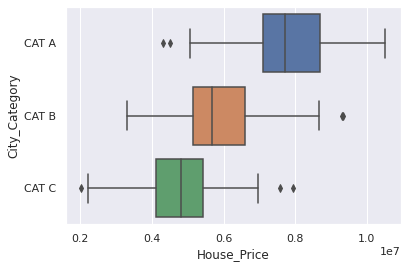

In [ ]:
covered = price2[price2.Parking == "Covered"]
sns.boxplot(x="House_Price", y="City_Category", data=covered)

In [ ]:
covA = covered[covered.City_Category == "CAT A"]
covB = covered[covered.City_Category == "CAT B"]
covC = covered[covered.City_Category == "CAT C"]

q1_covA = covA['House_Price'].quantile(0.25)
q3_covA = covA['House_Price'].quantile(0.75)
iqr_covA = q3_covA - q1_covA
outlier_bawah_covA = (covA['House_Price'] < (q1_covA - 1.5*iqr_covA))
rumah_tertutup_murahA = covA.loc[outlier_bawah_covA]

q1_covB = covB['House_Price'].quantile(0.25)
q3_covB = covB['House_Price'].quantile(0.75)
iqr_covB = q3_covB - q1_covB
outlier_bawah_covB = (covB['House_Price'] < (q1_covB - 1.5*iqr_covB))
rumah_tertutup_murahB = covB.loc[outlier_bawah_covB]

q1_covC = covC['House_Price'].quantile(0.25)
q3_covC = covC['House_Price'].quantile(0.75)
iqr_covC = q3_covC - q1_covC
outlier_bawah_covC = (covC['House_Price'] < (q1_covC - 1.5*iqr_covC))
rumah_tertutup_murahC = covC.loc[outlier_bawah_covC]

In [ ]:
rumah_tertutup_murahA


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
320,11240.0,9781.0,15232.0,1523.0,1813.0,Covered,CAT A,520,4496000
875,9997.0,12349.0,13043.0,1350.0,1606.0,Covered,CAT A,770,4303000


In [ ]:
rumah_tertutup_murahB

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price


In [ ]:
rumah_tertutup_murahC

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
622,4619.0,10768.0,11787.0,1624.0,1946.0,Covered,CAT C,870,2027000


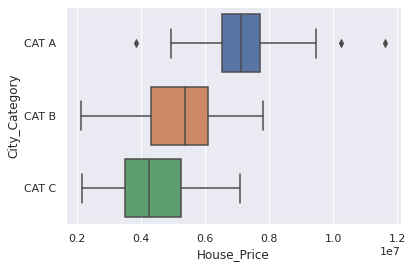

In [ ]:
no_parking = price2[price2.Parking == "No Parking"]
sns.boxplot(x="House_Price", y="City_Category", data = no_parking)

In [ ]:
no_parkingA = no_parking[no_parking.City_Category == "CAT A"]
no_parkingB = no_parking[no_parking.City_Category == "CAT B"]
no_parkingC = no_parking[no_parking.City_Category == "CAT C"]

q1_no_parkingA = no_parkingA['House_Price'].quantile(0.25)
q3_no_parkingA = no_parkingA['House_Price'].quantile(0.75)
iqr_no_parkingA = q3_no_parkingA - q1_no_parkingA
outlier_bawah_no_parkingA = (no_parkingA['House_Price'] < (q1_no_parkingA - 1.5*iqr_no_parkingA))
rumah_no_parking_murahA = no_parkingA.loc[outlier_bawah_no_parkingA]

q1_no_parkingB = no_parkingB['House_Price'].quantile(0.25)
q3_no_parkingB = no_parkingB['House_Price'].quantile(0.75)
iqr_no_parkingB = q3_no_parkingB - q1_no_parkingB
outlier_bawah_no_parkingB = (no_parkingB['House_Price'] < (q1_no_parkingB - 1.5*iqr_no_parkingB))
rumah_no_parking_murahB = no_parkingB.loc[outlier_bawah_no_parkingB]

q1_no_parkingC = no_parkingC['House_Price'].quantile(0.25)
q3_no_parkingC = no_parkingC['House_Price'].quantile(0.75)
iqr_no_parkingC = q3_no_parkingC - q1_no_parkingC
outlier_bawah_no_parkingC = (no_parkingC['House_Price'] < (q1_no_parkingC - 1.5*iqr_no_parkingC))
rumah_no_parking_murahC = no_parkingC.loc[outlier_bawah_no_parkingC]

In [ ]:
rumah_no_parking_murahA

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
409,8773.0,13547.0,15551.0,1509.0,1799.0,No Parking,CAT A,960,3860000


In [ ]:
rumah_no_parking_murahB

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price


In [ ]:
rumah_no_parking_murahC

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price


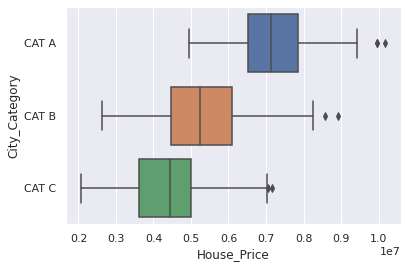

In [ ]:
not_provided = price2[price2.Parking == "Not Provided"]
sns.boxplot(x="House_Price", y="City_Category", data = not_provided)

In [ ]:
noprovA = not_provided[not_provided.City_Category == "CAT A"]
noprovB = not_provided[not_provided.City_Category == "CAT B"]
noprovC = not_provided[not_provided.City_Category == "CAT C"]

q1_noprovA = noprovA['House_Price'].quantile(0.25)
q3_noprovA = noprovA['House_Price'].quantile(0.75)
iqr_noprovA = q3_noprovA - q1_noprovA
outlier_bawah_noprovA = (noprovA['House_Price'] < (q1_noprovA - 1.5*iqr_noprovA))
rumah_gakadaparkir_murahA = noprovA.loc[outlier_bawah_noprovA]

q1_noprovB = noprovB['House_Price'].quantile(0.25)
q3_noprovB = noprovB['House_Price'].quantile(0.75)
iqr_noprovB = q3_noprovB - q1_noprovB
outlier_bawah_noprovB = (noprovB['House_Price'] < (q1_noprovB - 1.5*iqr_noprovB))
rumah_gakadaparkir_murahB = noprovB.loc[outlier_bawah_noprovB]

q1_noprovC = noprovC['House_Price'].quantile(0.25)
q3_noprovC = noprovC['House_Price'].quantile(0.75)
iqr_noprovC = q3_noprovC - q1_noprovC
outlier_bawah_noprovC = (noprovC['House_Price'] < (q1_noprovC - 1.5*iqr_noprovC))
rumah_gakadaparkir_murahC = noprovC.loc[outlier_bawah_noprovC]

In [ ]:
rumah_gakadaparkir_murahA

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price


In [ ]:
rumah_gakadaparkir_murahB

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price


In [ ]:
rumah_gakadaparkir_murahC

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price


## TUGAS NOMOR 3

In [ ]:
tips = pd.read_csv('/content/tips.csv')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
tips['sex'] = tips['sex'].astype('category')

In [ ]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker          object
day             object
time            object
size             int64
dtype: object

In [ ]:
tips['smoker'] = tips['smoker'].astype('category')
tips['time'] = tips['time'].astype('category')
tips['day'] = tips['day'].astype('category')
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [ ]:
print(tips.shape)

(244, 7)


In [ ]:
tips.duplicated().sum()

1

In [ ]:
tips.drop_duplicates(inplace = True)
print(tips.duplicated().sum())
print(tips.shape)

0
(243, 7)


In [ ]:
print(tips.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [ ]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

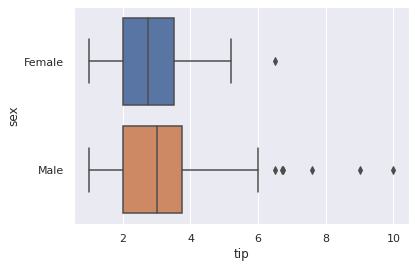

In [ ]:
p = sns.boxplot(x="tip", y="sex", data=tips)

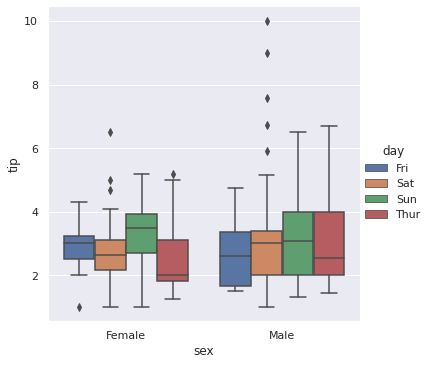

In [ ]:
p = sns.catplot(x="sex", y="tip", hue="day", kind="box", data=tips)

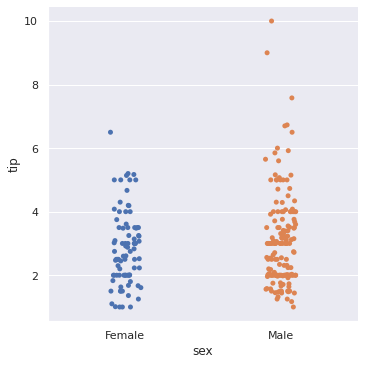

In [ ]:
p= sns.catplot(x="sex", y="tip", data=tips)

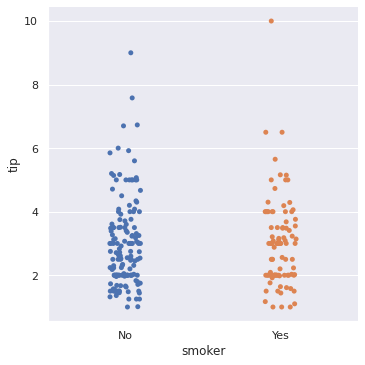

In [ ]:
p= sns.catplot(x="smoker", y="tip", data=tips)

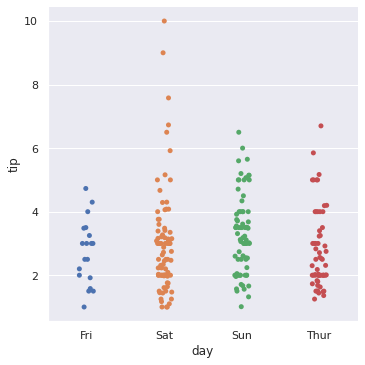

In [ ]:
p= sns.catplot(x="day", y="tip", data=tips)

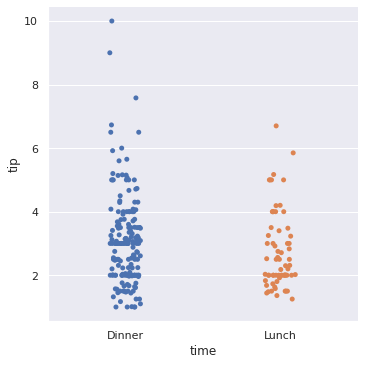

In [ ]:
p= sns.catplot(x="time", y="tip", data=tips)

In [ ]:
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,243.000000,243.000000,243,243,243,243,243.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.813868,3.002387,NaN,NaN,NaN,NaN,2.572016
std,8.910071,1.385002,NaN,NaN,NaN,NaN,0.952356
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.380000,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.810000,2.920000,NaN,NaN,NaN,NaN,2.000000
75%,24.175000,3.575000,NaN,NaN,NaN,NaN,3.000000


In [ ]:
tips.describe()

,total_bill,tip,size
count,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016
std,8.910071,1.385002,0.952356
min,3.070000,1.000000,1.000000
25%,13.380000,2.000000,2.000000
50%,17.810000,2.920000,2.000000
75%,24.175000,3.575000,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.674998,0.597589
tip,0.674998,1.000000,0.488400
size,0.597589,0.488400,1.000000


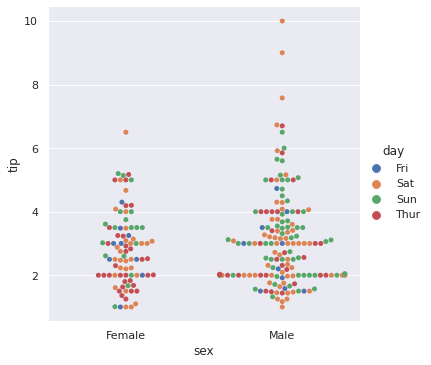

In [ ]:
p= sns.catplot(x="sex", y="tip", hue="day", kind="swarm", data=tips)

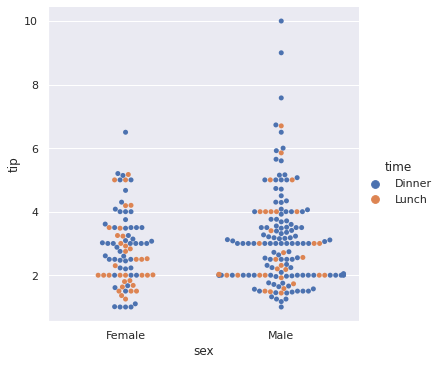

In [ ]:
p= sns.catplot(x="sex", y="tip", hue="time", kind="swarm", data=tips) 
#keliatannya dinner yg ngasi tips bykan male

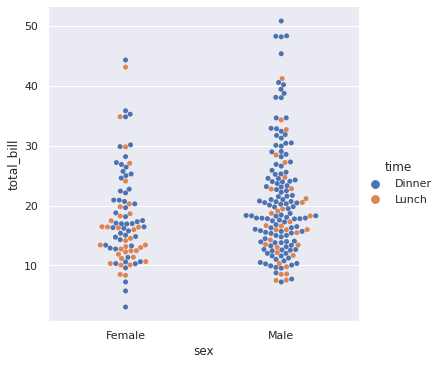

In [ ]:
p= sns.catplot(x="sex", y="total_bill", hue="time", kind="swarm", data=tips) 

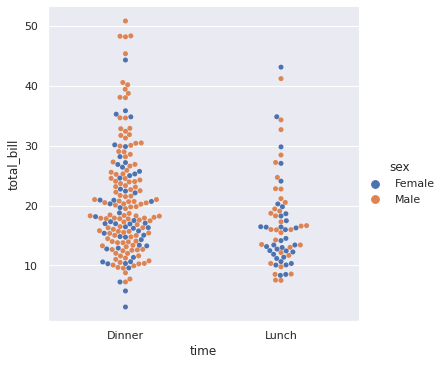

In [ ]:
p= sns.catplot(x="time", y="total_bill", hue="sex", kind="swarm", data=tips) 

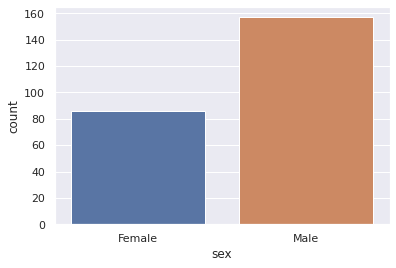

In [ ]:
p = sns.countplot(x="sex", data=tips) #bykan male 

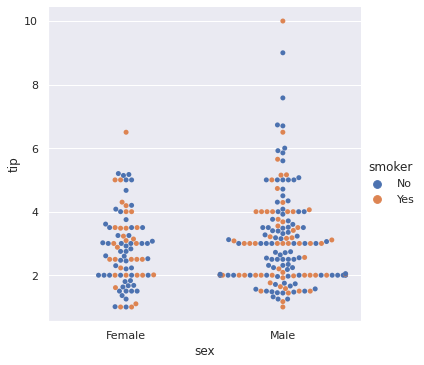

In [ ]:
p= sns.catplot(x="sex", y="tip", hue="smoker", kind="swarm", data=tips)

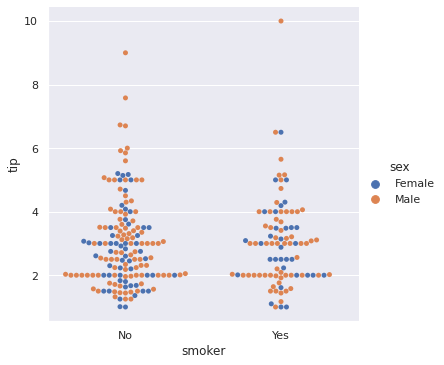

In [ ]:
p= sns.catplot(x="smoker", y="tip", hue="sex", kind="swarm", data=tips)

## 1. Adakah tipe variabel yang kurang tepat di data tersebut?

Ada, tipe variabel yang kurang tepat di data tersebut adalah tipe data object pada variabel sex, smoker, day, dan time yang seharusnya merupakan tipe variabel category

## 2. Apakah data numeriknya cenderung berdistribusi normal?

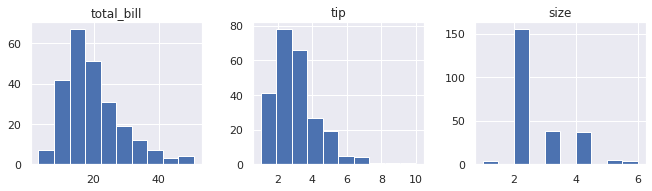

In [ ]:
numerical = tips.select_dtypes(include = ['int64','float64']).columns

tips[numerical].hist(figsize=(15, 6), layout=(2, 4));

Jika dilihat dari grafik di atas, data numeriknya cenderung tidak berdistribusi normal.

# 3. Apakah ada outlier, noise, missing values, dan-atau duplikasi data?

Ada outlier saat kita membandingkan variabel tips dengan sex

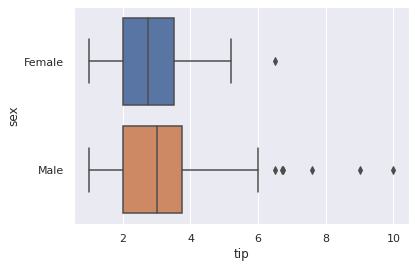

In [ ]:
p = sns.boxplot(x="tip", y="sex", data=tips) #dengan begitu dapat disimpulkan bahwa terdapat outlier

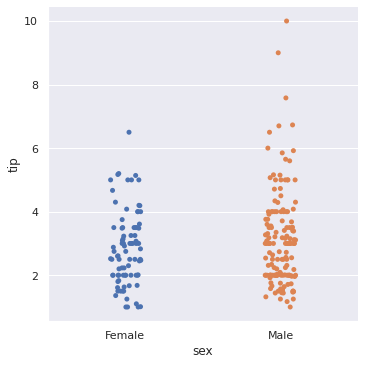

In [ ]:
p= sns.catplot(x="sex", y="tip", data=tips) #karena grafik bisa dibentuk dan dibaca, maka dapat disimpulkan tidak ada noise

Berdasarkan grafik, program, dan data yang sudah di cari tahu sebelumnya, kami memperkirakan bahwa pada data diatas tidak ditemukan noise karena saat kami plotting data, kami dapat membaca grafik dengan baik.

Lalu, kami memperkirakan bahwa data diatas memiliki outlier sebagaimana dapat dilihat di boxplot.

Menurut kami setelah menjalankan program "isnull" kami tidak menemukan adanya missing value di data tetapi setelah menjalankan program "duplicate" kami melihat bahwa terdapat satu duplikasi data pada data tips.

## 4. Apakah pelanggan pria dan wanita cenderung proporsional (balance)?

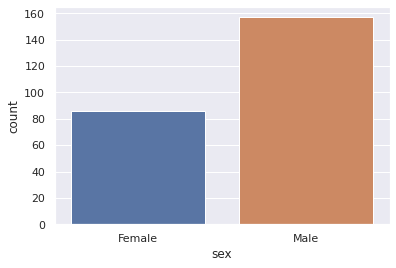

In [ ]:
p = sns.countplot(x="sex", data=tips) #bykan male 

Dari grafik diatas, dapat ditunjukkan bahwa terdapat lebih banyak pengunjung pria dibandingkan dengan wanita

## 5.Dari data yang ada apakah Pria atau wanita ada kecenderungan memberi tips lebih besar?

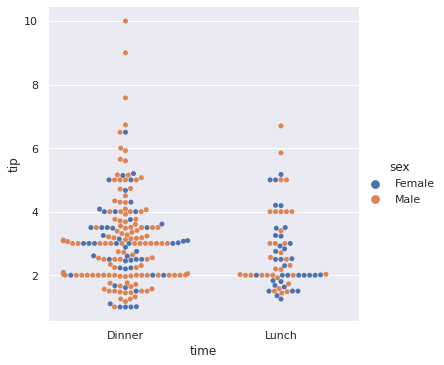

In [ ]:
p= sns.catplot(x="time", y="tip", hue="sex", kind="swarm", data=tips) 

Berdasarkan grafik diatas, terdapat kemungkinan tidak adanya kecenderungan baik pria atau wanita memberi tips lebih besar

## 6. Dari data yang ada apakah ada kecenderungan tips lebih besar di hari-hari tertentu?

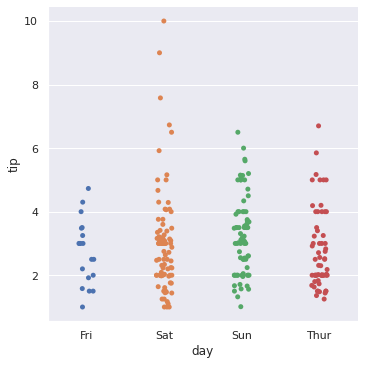

In [ ]:
p= sns.catplot(x="day", y="tip", data=tips)

dari grafik diatas, terdapat sebuah kemungkinan bahwa tidak ada kecenderungan tips lebih besar di hari tertentu, tetapi dapat dilihat bahwa pada hari Sabtu orang yang datang cenderung memberi tips lebih banyak.

#7. Dari data yang ada apakah customer perokok cenderung memberi tips lebih besar?

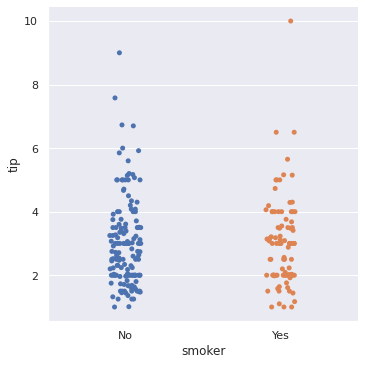

In [ ]:
p= sns.catplot(x='smoker', y='tip', data=tips)

Berdasarkan grafik diatas, kami memprediksi bahwa tidak terdapat hubungan antara customer perokok dengan tips yang diberikan.

#8. Apakah pola di nomor 5 dan 7 dipengaruhi hari?

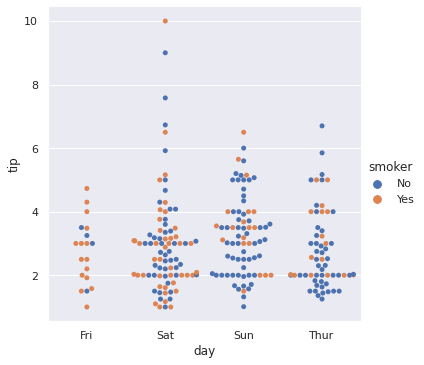

In [ ]:
p= sns.catplot(x="day", y="tip", hue="smoker", kind="swarm", data=tips)

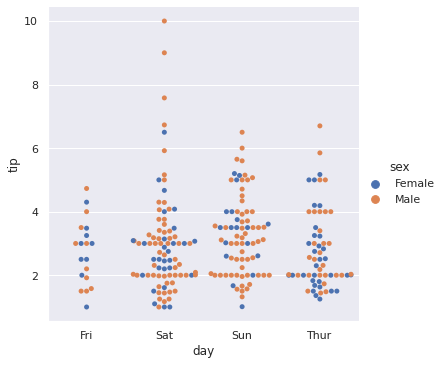

In [ ]:
p= sns.catplot(x="day", y="tip", hue="sex", kind="swarm", data=tips)

Berdasarkan grafik diatas kami memperkirakan bahwa berbedaan hari hampir tidak berpengaruh sedikitpun pada customer perokok, customer pria atau wanita, dengan tips yang diberikan.

#9. Pola apalagi yang dapat anda temukan? (misal, bisakah anda menyarankan tata letak kursi/meja restaurant dari data ini?)

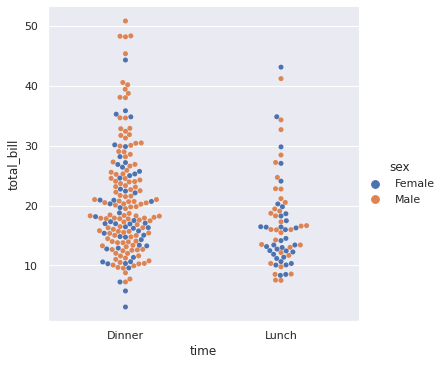

In [ ]:
p= sns.catplot(x="time", y="total_bill", hue="sex", kind="swarm", data=tips) 

Dari grafik diatas, kami memperkirakan bahwa pada jam makan malam, pria lebih banyak bill sehingga kami memprediksi bahwa pada malam hari restoran cenderung terisi oleh pasangan karena lebih banyak pria yang membayar.

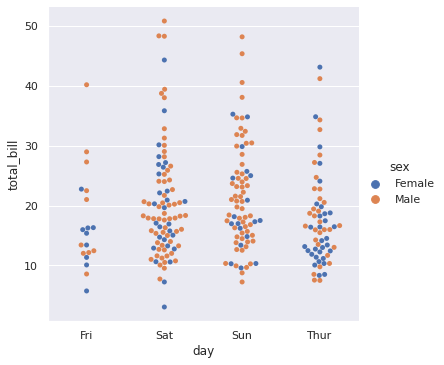

In [ ]:
p= sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips) 

Dari grafik diatas, kami dapat melihat bahwa pada waktu weekend yaitu Jumat, Sabtu, dan Minggu, pria cenderung lebih banyak pada total bill sehingga kami memprediksi bahwa saat weekend banyak pasangan yang datang.

Dari dua grafik diatas, kami memprediksi bahwa kemungkinan penyusunan meja dan kursi yang terbaik saat weekend adalah berpasang - pasangan saat dinner.

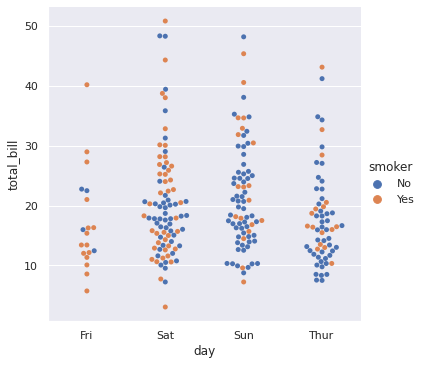

In [ ]:
p= sns.catplot(x="day", y="total_bill", hue="smoker", kind="swarm", data=tips) 

Dari grafik tersebut, kami memprediksi bahwa akan lebih baik jika restoran menyediakan smoking area lebih sedikit karena berdasarkan data dan grafik di atas terlihat bahwa komposisi lebih banyak adalah tidak perokok.

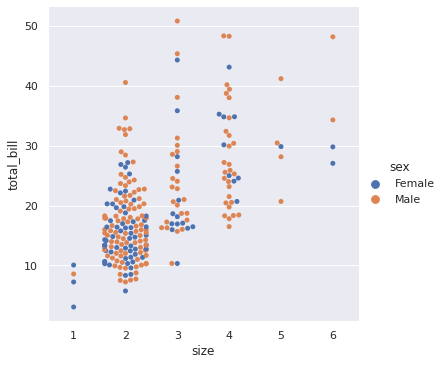

In [ ]:
p= sns.catplot(x="size", y="total_bill", hue="sex", kind="swarm", data=tips) 

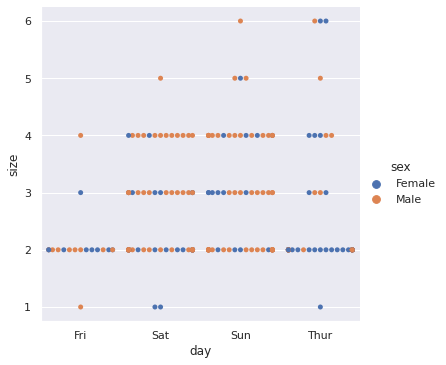

In [ ]:
p= sns.catplot(x="day", y="size", hue="sex", kind="swarm", data=tips) 

Dari grafik diatas, kami memperkirakan bahwa restoran ini cenderung memiliki customer yang berpasang-pasangan di keempat hari itu, tetapi pada hari sabtu dan minggu, kami memperkirakan bahwa restoran cenderung memiliki komposisi customer yang seimbang antara berpasangan, berkeluarga, dan lain-lain.

#10. Final question: dari hasil EDA anda saran apa saja yang akan anda berikan ke pemilik restaurant?

Berdasarkan seluruh data dan grafik di atas, kami menyarankan akan lebih baik jika restoran memperbanyak komposisi pegawai perempuan karena bisa dilihat bahwa jumlah customer yang datang cenderung lebih banyak berjenis kelamin laki laki. Selain itu, desain restoran lebih baik dibuat senyaman mungkin untuk keluarga dan pasangan sebagaimana dilihat pada grafik size dan hari. Kemudian, kami menyarankan agar tempat smoking area dibuat lebih kecil karena cenderung lebih banyak customer yang tidak merokok. Lalu, tata letak kursi dan meja dibuat secara seimbang antara untuk yang berpasangan dan berkeluarga sebagaimana dilihat pada grafik di atas bahwa customer cenderung datang secara berpasangan atau berkeluarga, terutama di hari weekend.